<a href="https://colab.research.google.com/github/prasad4fun/Exploratory-Data-Analysis/blob/master/EDA_haberman_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
haberman = pd.read_csv("haberman.csv")

In [4]:
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Columns Description**:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [5]:
haberman.shape, haberman.columns

((305, 4), Index(['30', '64', '1', '1.1'], dtype='object'))

In [0]:
haberman.columns = ['age', 'op_year', 'axil_nodes_det', 'status']

In [7]:
haberman["status"].value_counts()

1    224
2     81
Name: status, dtype: int64

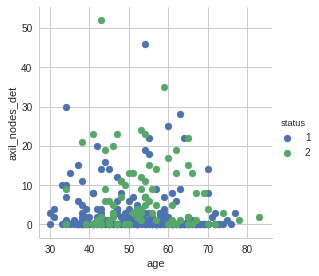

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "axil_nodes_det") \
   .add_legend();
plt.show();

we cannot distinguish patients survival status using **age** and **number of axillary nodes**

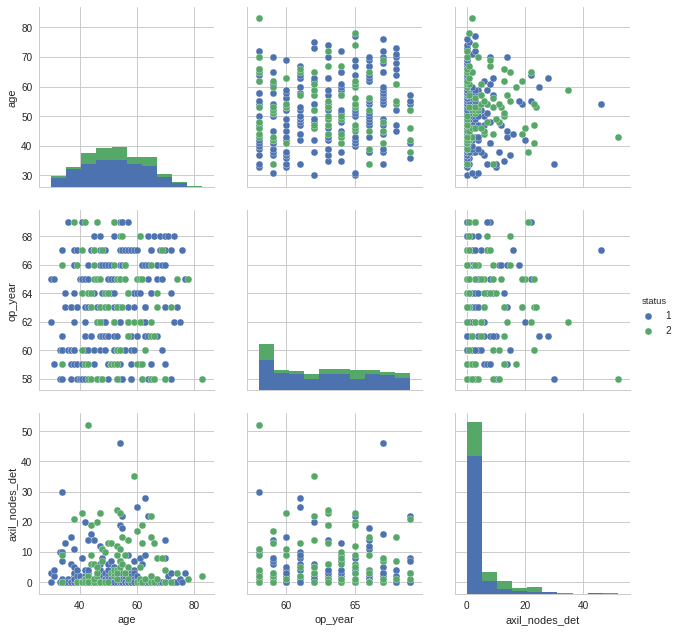

In [10]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3, vars=['age', 'op_year', 'axil_nodes_det']);
plt.show();

The Data is highly overlapping, None of the combination of features help us to make survival status linearly seperable 

# Lets try if we can make use of one single feature to classify the survival status

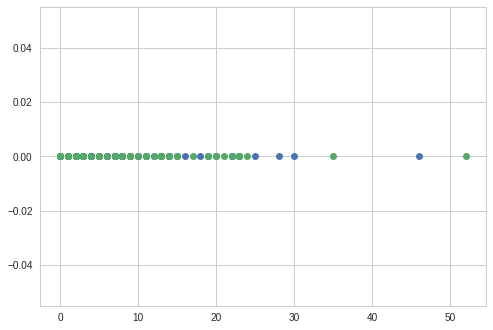

In [11]:
import numpy as np

haberman_1 = haberman.loc[haberman["status"] == 1]
haberman_2 = haberman.loc[haberman["status"] == 2]

plt.plot( haberman_1["axil_nodes_det"], np.zeros_like( haberman_1["axil_nodes_det"] ), 'o')
plt.plot( haberman_2["axil_nodes_det"], np.zeros_like( haberman_2["axil_nodes_det"] ), 'o')

plt.show()

Hard to Decode distributions of the values, lets try histogram charts which will help in understanding the distribution of data much better

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


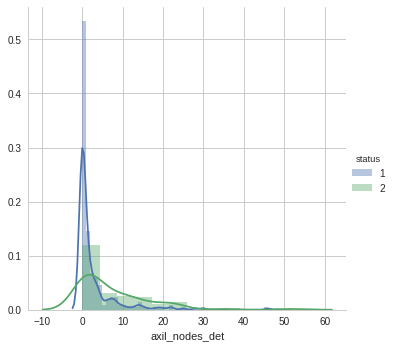

In [12]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "axil_nodes_det") \
   .add_legend();
plt.show();

Patients who have axillary nodes between range of 0-5 mostly survived compared to who have more than 5 axillary nodes

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


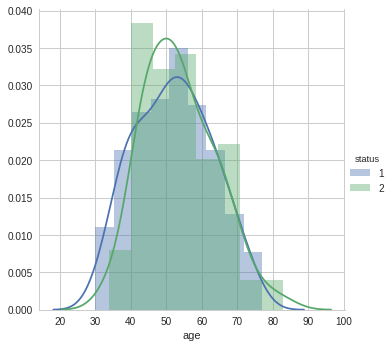

In [13]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

Highly overlapping between survival status 1 & 2, cannot make any observations using age feature

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


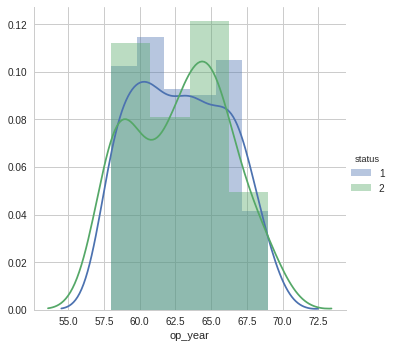

In [14]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.show();

Highly overlapping between survival status 1 & 2, cannot make any observations using op_year feature

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


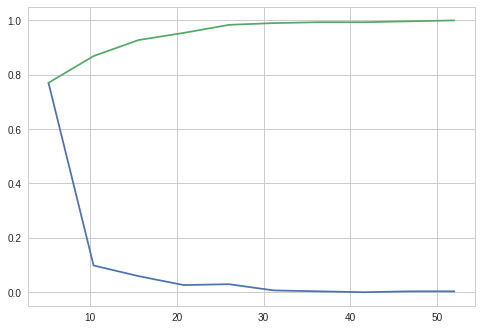

In [15]:
counts, bin_edges = np.histogram(haberman['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

78% of people have less than 5 axillary node detected.


[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


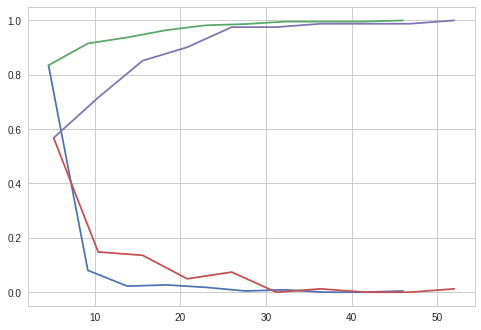

In [16]:
counts, bin_edges = np.histogram(haberman_1['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(haberman_2['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

In [20]:
haberman.describe()

,age,op_year,axil_nodes_det,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Box plot with whiskers using IQR

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


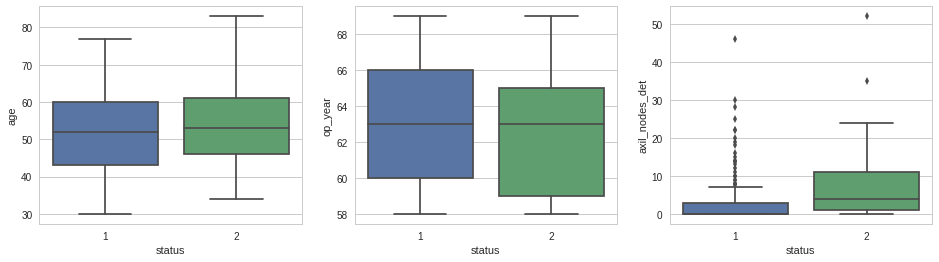

In [24]:
plt.subplots(1,3, figsize=(16,4))

plt.subplot(1,3,1)
sns.boxplot(x='status',y='age', data=haberman)


plt.subplot(1,3,2)
sns.boxplot(x='status',y='op_year', data=haberman)


plt.subplot(1,3,3)
sns.boxplot(x='status',y='axil_nodes_det', data=haberman)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


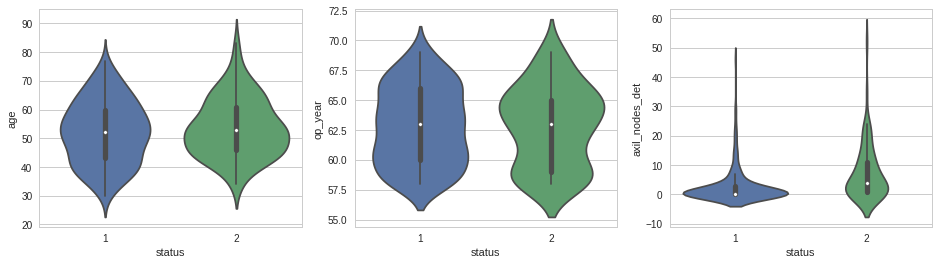

In [25]:
plt.subplots(1,3, figsize=(16,4))

plt.subplot(1,3,1)
sns.violinplot(x='status',y='age', data=haberman)


plt.subplot(1,3,2)
sns.violinplot(x='status',y='op_year', data=haberman)


plt.subplot(1,3,3)
sns.violinplot(x='status',y='axil_nodes_det', data=haberman)

plt.show()


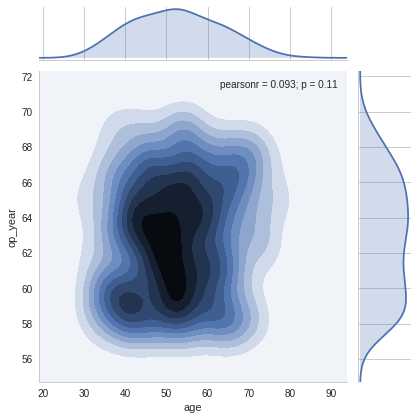

In [26]:
sns.jointplot(data=haberman, x="age", y="op_year", kind="kde")
plt.show()

Most of patients who went to operation age ranges 43-54 in years 1959 - 1964

# Conclusion:

*   Out of all features axil_nodes_det is the most important one and patients who have less than 5 axillary nodes have higher chances of survival
*   Age and year are not helping much to determine survival status
* Bi-variate analysis none of the combination helps to determine the survival status



